<a href="https://colab.research.google.com/github/RewinaB/Deep-Learning-Projects/blob/main/Employee_attrition_IBM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit,GridSearchCV,train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding = 'utf-8')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.options.display.max_columns=500
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


My Y or target which is categorical need to be encoded as binary. Categorical features should be numerical in to 0 and 1. Need to be one hot encoded

Bad Option: Label Encoding
technical → 0
research → 1
non-technical → 2
consulting → 3
This gives the model the false assumption that "consulting" > "technical", which is meaningless for unordered categories.

Better option: One-hot encoding creates binary (0/1) columns for each unique category.

| job\_role\_technical | job\_role\_research | job\_role\_non-technical | job\_role\_consulting |
| -------------------- | ------------------- | ------------------------ | --------------------- |
| 1                    | 0                   | 0                        | 0                     |
| 0                    | 1                   | 0                        | 0                     |
| 0                    | 0                   | 1                        | 0                     |
| 0                    | 0                   | 0                        | 1                     |




import pandas as pd

df = pd.DataFrame({
    "job_role": ["technical", "research", "non-technical", "consulting", "technical"]
})

# One-hot encode
If more than 2 categories and no order
df_encoded = pd.get_dummies(df, columns=["job_role"], drop_first=False)

print(df_encoded)


When running Regressions or similar:

> **Why is `drop_first=True` necessary when one-hot encoding, especially for linear models like logistic regression?**

The Problem: **Multicollinearity**

When you one-hot encode a categorical variable with `k` categories, you create **k binary columns**. But here’s the issue:
> These `k` columns are **perfectly collinear** (i.e., one can be derived from the others).
This is called the **dummy variable trap**.

Why Is That Bad?

### In **linear models** (like logistic regression or linear regression):

* Multicollinearity causes the model to **fail to estimate coefficients uniquely**.
* You get **unstable or inflated coefficients**, and your model might throw an error or give misleading interpretations.

 The Fix: `drop_first=True`

Drop one dummy column → now you have `k-1` columns.

This solves the problem because:

* The missing category becomes the **baseline/reference**
* The remaining columns express differences **relative to that base**

### Example with `drop_first=True`:

| job\_role\_research | job\_role\_non-technical | job\_role\_consulting           |
| ------------------- | ------------------------ | ------------------------------- |
| 0                   | 0                        | 0  ← interpreted as "technical" |
| 1                   | 0                        | 0                               |
| 0                   | 1                        | 0                               |
| 0                   | 0                        | 1                               |

In [5]:
df.shape

(1470, 35)

In [6]:
#To check which are binary
df.Gender.value_counts()

,count
Gender,
Male,882
Female,588


In [7]:
#Binary columns : Attrition, Gender, Over_18, OverTime #Binary Encode
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x=='Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [10]:
#For one hot encoding-dummies
#One hot encode: Business Travel, Education field, job role, marital status, dedpartmrnt
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel',axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop ('Department',axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='EducationField')).drop ('EducationField',axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop ('JobRole',axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')).drop ('MaritalStatus',axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [11]:
#Covert the bove booleans to 0 and 1
df=df.map(lambda x: 1 if x is True else 0 if x is False else x)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [12]:
df=df.drop('EmployeeNumber', axis=1)

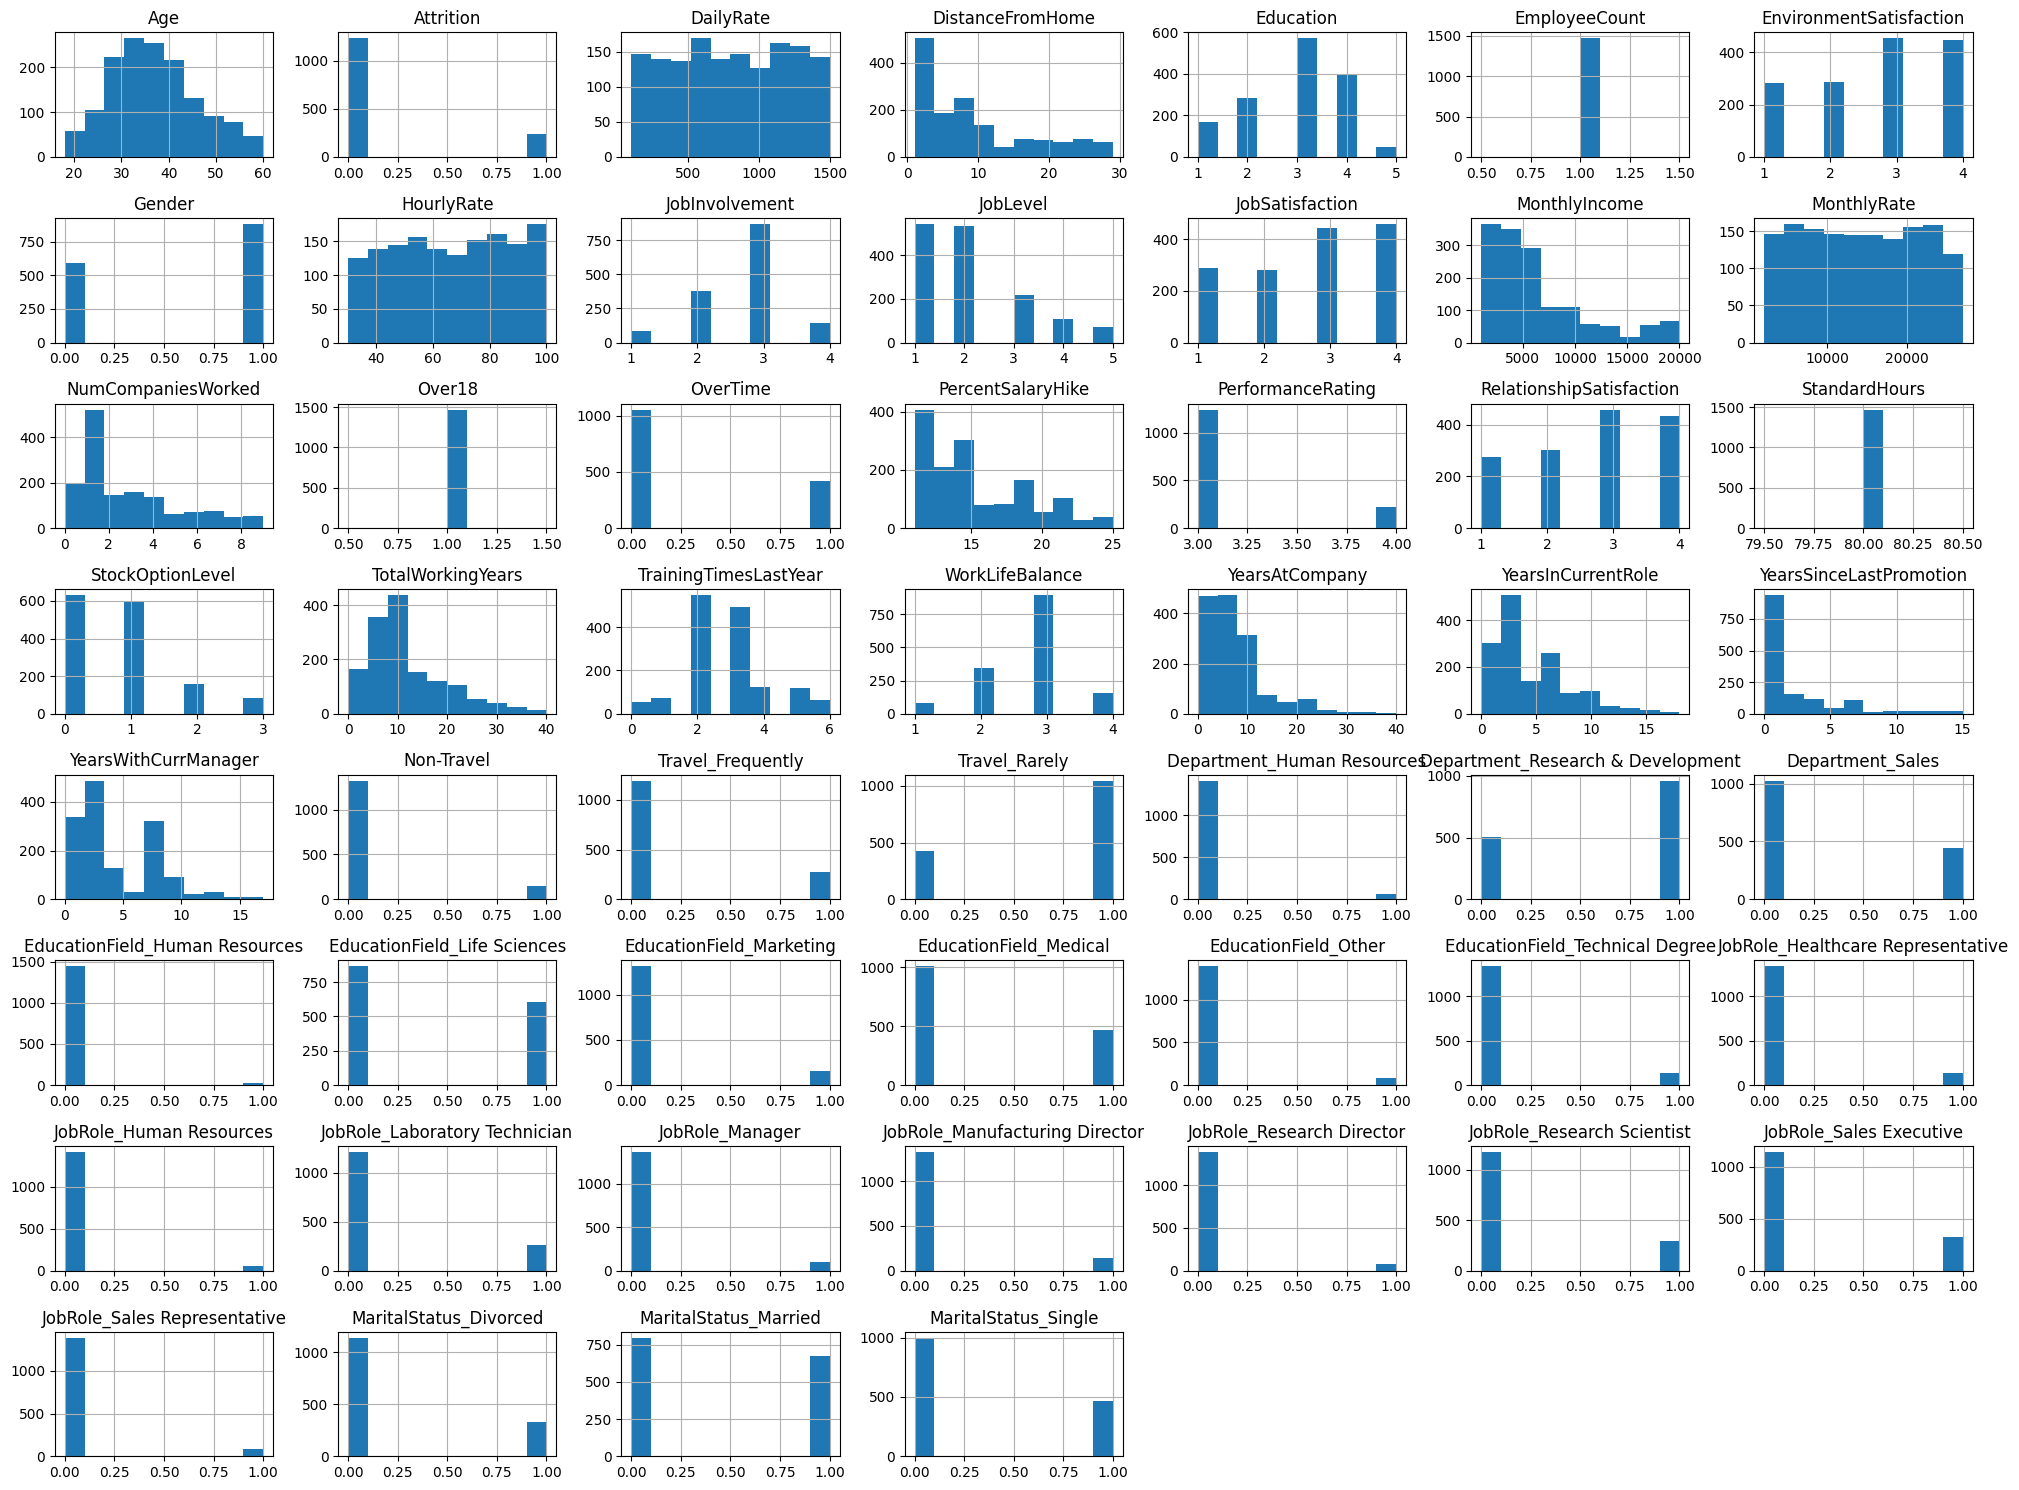

In [13]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [16]:
df=df.drop(['EmployeeCount','Over18', 'StandardHours'], axis=1)

**MODEL TRAINING**

In [18]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
X, y = df.drop('Attrition', axis=1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#for reproducibility
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

| Parameter      | What It Controls                       | Type        | Typical Value          |
| -------------- | -------------------------------------- | ----------- | ---------------------- |
| `n_estimators` | Number of trees in the forest          | Model size  | 100, 200, 500, etc.    |
| `n_jobs`       | Number of CPU cores to use in training | Parallelism | -1 (all), 1, 2, 4, etc |
Number of individual decision trees in the random forest.

More trees → better performance (up to a point)

Reduces variance (makes predictions more stable)

Increases training time and model size

 Rule of thumb:
Use 100–500 for decent performance

Higher for complex data or if you have compute power

**n_jobs:**
How many CPU cores to use in parallel during training and prediction.

n_jobs=1 → Use 1 core (default)

n_jobs=-1 → Use all available cores

Speeds up training but doesn’t affect model accuracy

In [21]:
model.score(X_test, y_test)

0.8775510204081632

**Feature Importance**

What factors are important?

In [29]:
sorted_importances =dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse= True))
print(sorted_importances)

{'MonthlyIncome': np.float64(0.07562059545291859), 'OverTime': np.float64(0.058436193927583896), 'Age': np.float64(0.05492248363255074), 'TotalWorkingYears': np.float64(0.05245494125861321), 'DailyRate': np.float64(0.0492545682430527), 'MonthlyRate': np.float64(0.04653634369967264), 'HourlyRate': np.float64(0.04592163284974639), 'DistanceFromHome': np.float64(0.045393096488616634), 'YearsAtCompany': np.float64(0.039587246737172496), 'NumCompaniesWorked': np.float64(0.03392720541218621), 'YearsWithCurrManager': np.float64(0.03377754061676112), 'PercentSalaryHike': np.float64(0.03183923933101171), 'StockOptionLevel': np.float64(0.029916997842982348), 'YearsInCurrentRole': np.float64(0.02932665770871727), 'JobSatisfaction': np.float64(0.02493099830698663), 'TrainingTimesLastYear': np.float64(0.02489908862756077), 'YearsSinceLastPromotion': np.float64(0.02468098044638497), 'EnvironmentSatisfaction': np.float64(0.022606634566707993), 'WorkLifeBalance': np.float64(0.02153115845346659), 'JobI

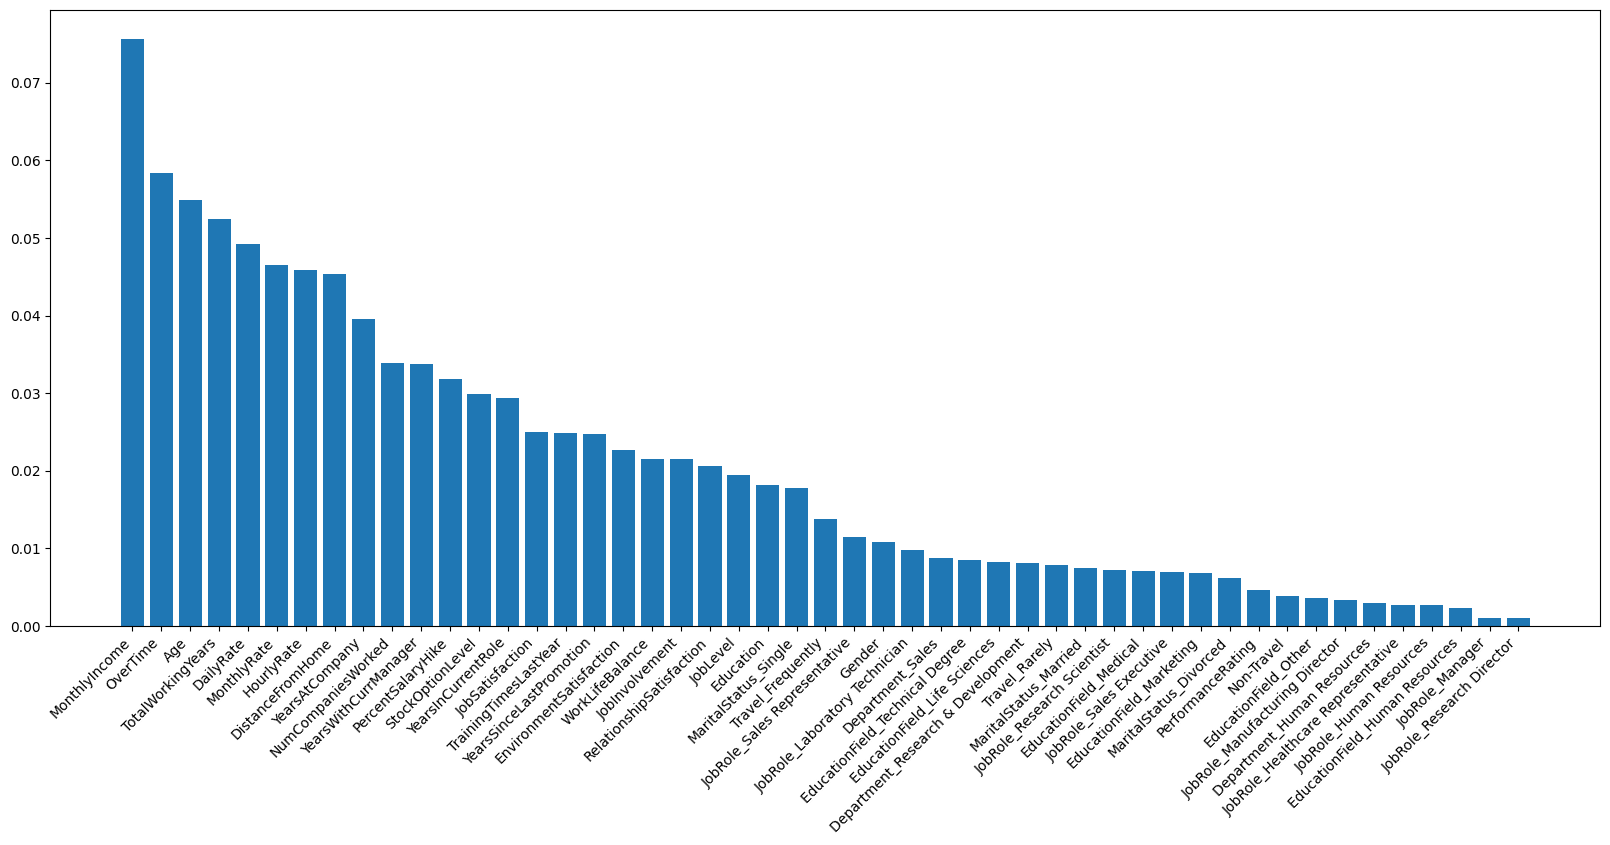

In [30]:
import matplotlib.pyplot as plt
plt.figure (figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha='right')
plt.show()